In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Config
np.random.seed(20)
# /Config

In [6]:
# Extrair dados
uri= 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
dados = pd.read_csv(uri)

mapa = {
    'unfinished': 'nao_finalizado',
    'expected_hours': 'horas_esperadas',
    'price': 'preco',
}

dados = dados.rename(columns=mapa)
troca = {
    0: 1,
    1: 0
}
dados['finalizado'] = dados.nao_finalizado.map(troca)
dados.head()
# /Extrair dados

nao_finalizado  horas_esperadas  preco  finalizado
0               1               26    192           0
1               1               88   9015           0
2               1               89   2577           0
3               1               42    275           0
4               1               39    170           0

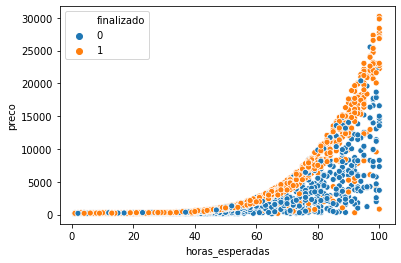

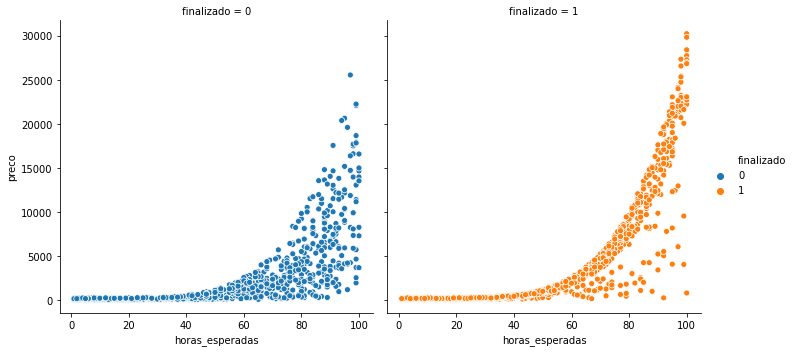

In [7]:
# Plotando
sns.scatterplot(x='horas_esperadas', y='preco', data=dados, hue='finalizado')
sns.relplot(x='horas_esperadas', y='preco', data=dados, col='finalizado', hue='finalizado')
# plt.show()
# /Plotando


In [9]:
# Modelagem
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, stratify=y)
model = LinearSVC()
model.fit(train_x, train_y)
print('Treinando com %d elementos' % len(train_x))
# /Modelagem

Treinando com 1617 elementos


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [10]:
# Teste
print('Testando com %d elementos' % len(test_x))
predict = model.predict(test_x)
score = accuracy_score(test_y, predict) * 100
print('Score: %.2f%%' % score)
# /Teste

Testando com 540 elementos
Score: 63.89%


In [11]:
# Base line
base_line = np.ones(len(test_x))
base_line_score = accuracy_score(test_y, base_line) * 100
print('Base line score: %.2f%%' % base_line_score)
# /Base line

Base line score: 52.59%
